<a href="https://colab.research.google.com/github/HasnainTariq1/PRODIGY_ML_02/blob/main/K_means_clustering_algorithm_to_group_customers_based_on_their_purchase_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Reading the CSV file into a DataFrame
url = 'https://raw.githubusercontent.com/HasnainTariq1/PRODIGY_ML_02/main/Mall_Customers.csv'

df=pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Selecting specific columns from the DataFrame
data_frame=df[['Annual Income (k$)','Spending Score (1-100)']]
data_frame

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
# Initializing the MinMaxScaler which scales the data between 0 and 1
scaler = MinMaxScaler()


# Fitting the scaler to the 'Annual Income (k$)' column
scaler.fit(data_frame[['Annual Income (k$)']])
data_frame['Annual Income (k$)']=scaler.transform(data_frame[['Annual Income (k$)']])

# Repeating the same steps for the 'Spending Score (1-100)' column
scaler.fit(data_frame[['Spending Score (1-100)']])
data_frame['Spending Score (1-100)']=scaler.transform(data_frame[['Spending Score (1-100)']])

<ipython-input-5-a48f5875056d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Annual Income (k$)']=scaler.transform(data_frame[['Annual Income (k$)']])
<ipython-input-5-a48f5875056d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Spending Score (1-100)']=scaler.transform(data_frame[['Spending Score (1-100)']])


 # Elbow Method

In [6]:
# Defining the range of 'k' values (number of clusters) to test in the KMeans algorithm
k_range=range(1,10)

# Initializing an empty list to store the sum of squared errors (SSE)
sse=[]

# Looping over the values of 'k' to apply KMeans clustering for different numbers of clusters
for i in k_range:

  # Creating a KMeans model
  km = KMeans(n_clusters=i,init='k-means++')
  km.fit(data_frame)
  sse.append(km.inertia_)

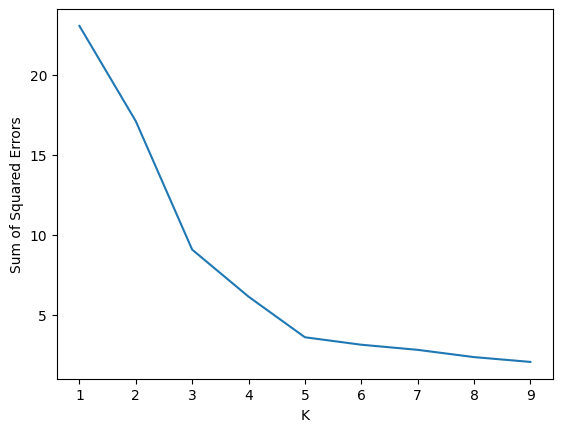

In [7]:
# Plotting the 'k_range' on the x-axis and the 'sse' values on the y-axis
plt.xlabel('K')
plt.ylabel("Sum of Squared Errors")
plt.plot(k_range,sse)
plt.show()

In [8]:
# Creating a KMeans model with 5 clusters
km=KMeans(n_clusters=5, init='k-means++')

# Fitting the KMeans model to the scaled data and predicting the cluster assignments for each data point
y_predicted = km.fit_predict(data_frame)
y_predicted


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

<ipython-input-9-3b1161223cb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['clusters']=y_predicted


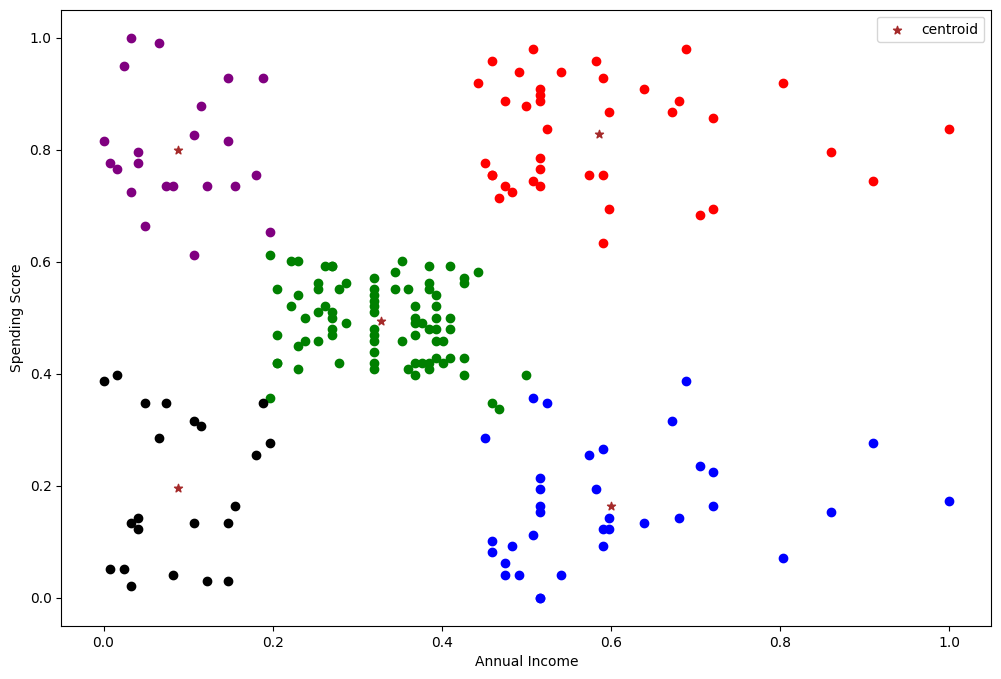

In [9]:
# Adding the predicted cluster labels to the original data frame as a new column 'clusters'
data_frame['clusters']=y_predicted


# Creating new DataFrames for each cluster (0 to 4) by filtering rows based on the cluster label
df1= data_frame[data_frame.clusters==0]
df2= data_frame[data_frame.clusters==1]
df3= data_frame[data_frame.clusters==2]
df4= data_frame[data_frame.clusters==3]
df5= data_frame[data_frame.clusters==4]

# Increase figure size (width, height)
plt.figure(figsize=(12, 8))



# Plotting a scatter plot for each cluster with different colors
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='blue')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='green')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='black')

# Plotting the centroids of each cluster as a star ('*') marker
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='brown',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()
plt.show()

In [10]:
data_frame.head(20)

,Annual Income (k$),Spending Score (1-100),clusters
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4
5,0.016393,0.765306,3
6,0.024590,0.051020,4
7,0.024590,0.948980,3
8,0.032787,0.020408,4
9,0.032787,0.724490,3
